https://www.kaggle.com/datasets/madislemsalu/facebook-ad-campaign

# **Load libraries**

In [6]:
# Mount your Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Dataset**

In [9]:
df = pd.read_csv('/content/drive/My Drive/DSApplication/Week 2/data-fb.csv')
df

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.000000,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.000000,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.000000,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.000000,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.000000,1,1.29,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,19/08/2017,19/08/2017,45-49,F,109,111,114,1129773,252,358.189997,13,2.00,NaN,NaN
1139,1314411,19/08/2017,19/08/2017,45-49,F,110,111,116,637549,120,173.880003,3,0.00,NaN,NaN
1140,1314412,19/08/2017,19/08/2017,45-49,F,111,113,117,151531,28,40.289999,2,0.00,NaN,NaN
1141,1314414,17/08/2017,17/08/2017,45-49,F,113,114,117,790253,135,198.710001,8,2.00,NaN,NaN


In [10]:
df.columns

Index(['ad_id', 'reporting_start', 'reporting_end', 'campaign_id',
       'fb_campaign_id', 'age', 'gender', 'interest1', 'interest2',
       'interest3', 'impressions', 'clicks', 'spent', 'total_conversion',
       'approved_conversion'],
      dtype='object')

FEATURE DESCRIPTION :

* **ad_id** is the id of specific ad set | It is an numerical feature
* Reporting_start and reporting_end are the start and end dates of the each ad
* Campaign_id is the id assigned by the ad running company
* fb_campaign_id is the id assigned by facebook for every ad set
* age and gender talk about the demographics | It is a categorical feature
* Interest1, Interest2, Interest3 are the user interests and likes of facebook users who were taregted for the ad
* Impressiosn are the number of times the ad was shown to the users |
* Clicks is the number of time users clicked on the ad
* spent is the amount of money spent on each campaign
* Totalconversions is the number of users who have clicked the ad and have made a purchase or installed an app
* approved_conversions tells how many became actual active users

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   reporting_start      1143 non-null   object 
 2   reporting_end        1143 non-null   object 
 3   campaign_id          1143 non-null   object 
 4   fb_campaign_id       1143 non-null   object 
 5   age                  1143 non-null   object 
 6   gender               1143 non-null   object 
 7   interest1            1143 non-null   int64  
 8   interest2            1143 non-null   int64  
 9   interest3            1143 non-null   int64  
 10  impressions          1143 non-null   float64
 11  clicks               1143 non-null   int64  
 12  spent                1143 non-null   float64
 13  total_conversion     761 non-null    float64
 14  approved_conversion  761 non-null    float64
dtypes: float64(4), int64(5), object(6)
mem

In [12]:
df.describe()

,ad_id,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
count,1.143000e+03,1143.000000,1.143000e+03,1143.000000,1.143000e+03,1143.000000,1143.000000,761.000000,761.000000
mean,9.872611e+05,33.884514,1.180606e+05,42.474191,6.872500e+04,11.629921,17.597760,2.161629,0.768725
std,1.939928e+05,27.560263,2.670506e+05,48.987248,2.067023e+05,27.347899,48.418711,4.062201,1.656445
min,7.087460e+05,2.000000,3.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,16.000000,2.200000e+01,19.000000,1.442650e+02,1.000000,0.000000,1.000000,0.000000
50%,1.121185e+06,26.000000,3.300000e+01,27.000000,3.142000e+03,2.000000,1.530000,1.000000,0.000000
75%,1.121804e+06,32.000000,9.889400e+04,38.000000,2.786400e+04,8.000000,8.540000,2.000000,1.000000
max,1.314415e+06,120.000000,2.286228e+06,421.000000,3.052003e+06,340.000000,639.949998,60.000000,21.000000


# **Unique vs Null Values**

In [13]:
#unique vals
df.nunique().sort_values(ascending=False)

ad_id                  1143
impressions            1126
spent                   509
fb_campaign_id          490
interest2               431
interest3               168
clicks                   97
interest1                64
gender                   63
age                      44
total_conversion         24
approved_conversion      15
reporting_start          14
reporting_end            14
campaign_id               7
dtype: int64

In [14]:
# null values
df.isnull().sum().sort_values(ascending=False)

total_conversion       382
approved_conversion    382
ad_id                    0
reporting_start          0
reporting_end            0
campaign_id              0
fb_campaign_id           0
age                      0
gender                   0
interest1                0
interest2                0
interest3                0
impressions              0
clicks                   0
spent                    0
dtype: int64

# **Duplicates**

In [15]:
df_dup = df[df.duplicated()]
print("you have {} duplicate rows".format(len(df_dup)))

you have 0 duplicate rows


In [16]:
#drop empty rows
df.dropna(inplace=True)
df

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.430000,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.820000,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.000000,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.250000,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.290000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,1121585,20/08/2017,20/08/2017,1178,144621,40-44,M,66,72,68,9773.0,1,1.460000,1.0,0.0
757,1121589,20/08/2017,20/08/2017,1178,144622,45-49,M,10,16,11,464036.0,77,123.550000,3.0,1.0
758,1121590,20/08/2017,20/08/2017,1178,144622,45-49,M,10,16,15,478480.0,75,135.750001,3.0,1.0
759,1121592,20/08/2017,20/08/2017,1178,144622,45-49,M,10,14,11,428812.0,66,116.880000,4.0,2.0


In [17]:
df.shape

(761, 15)

# **EDA**

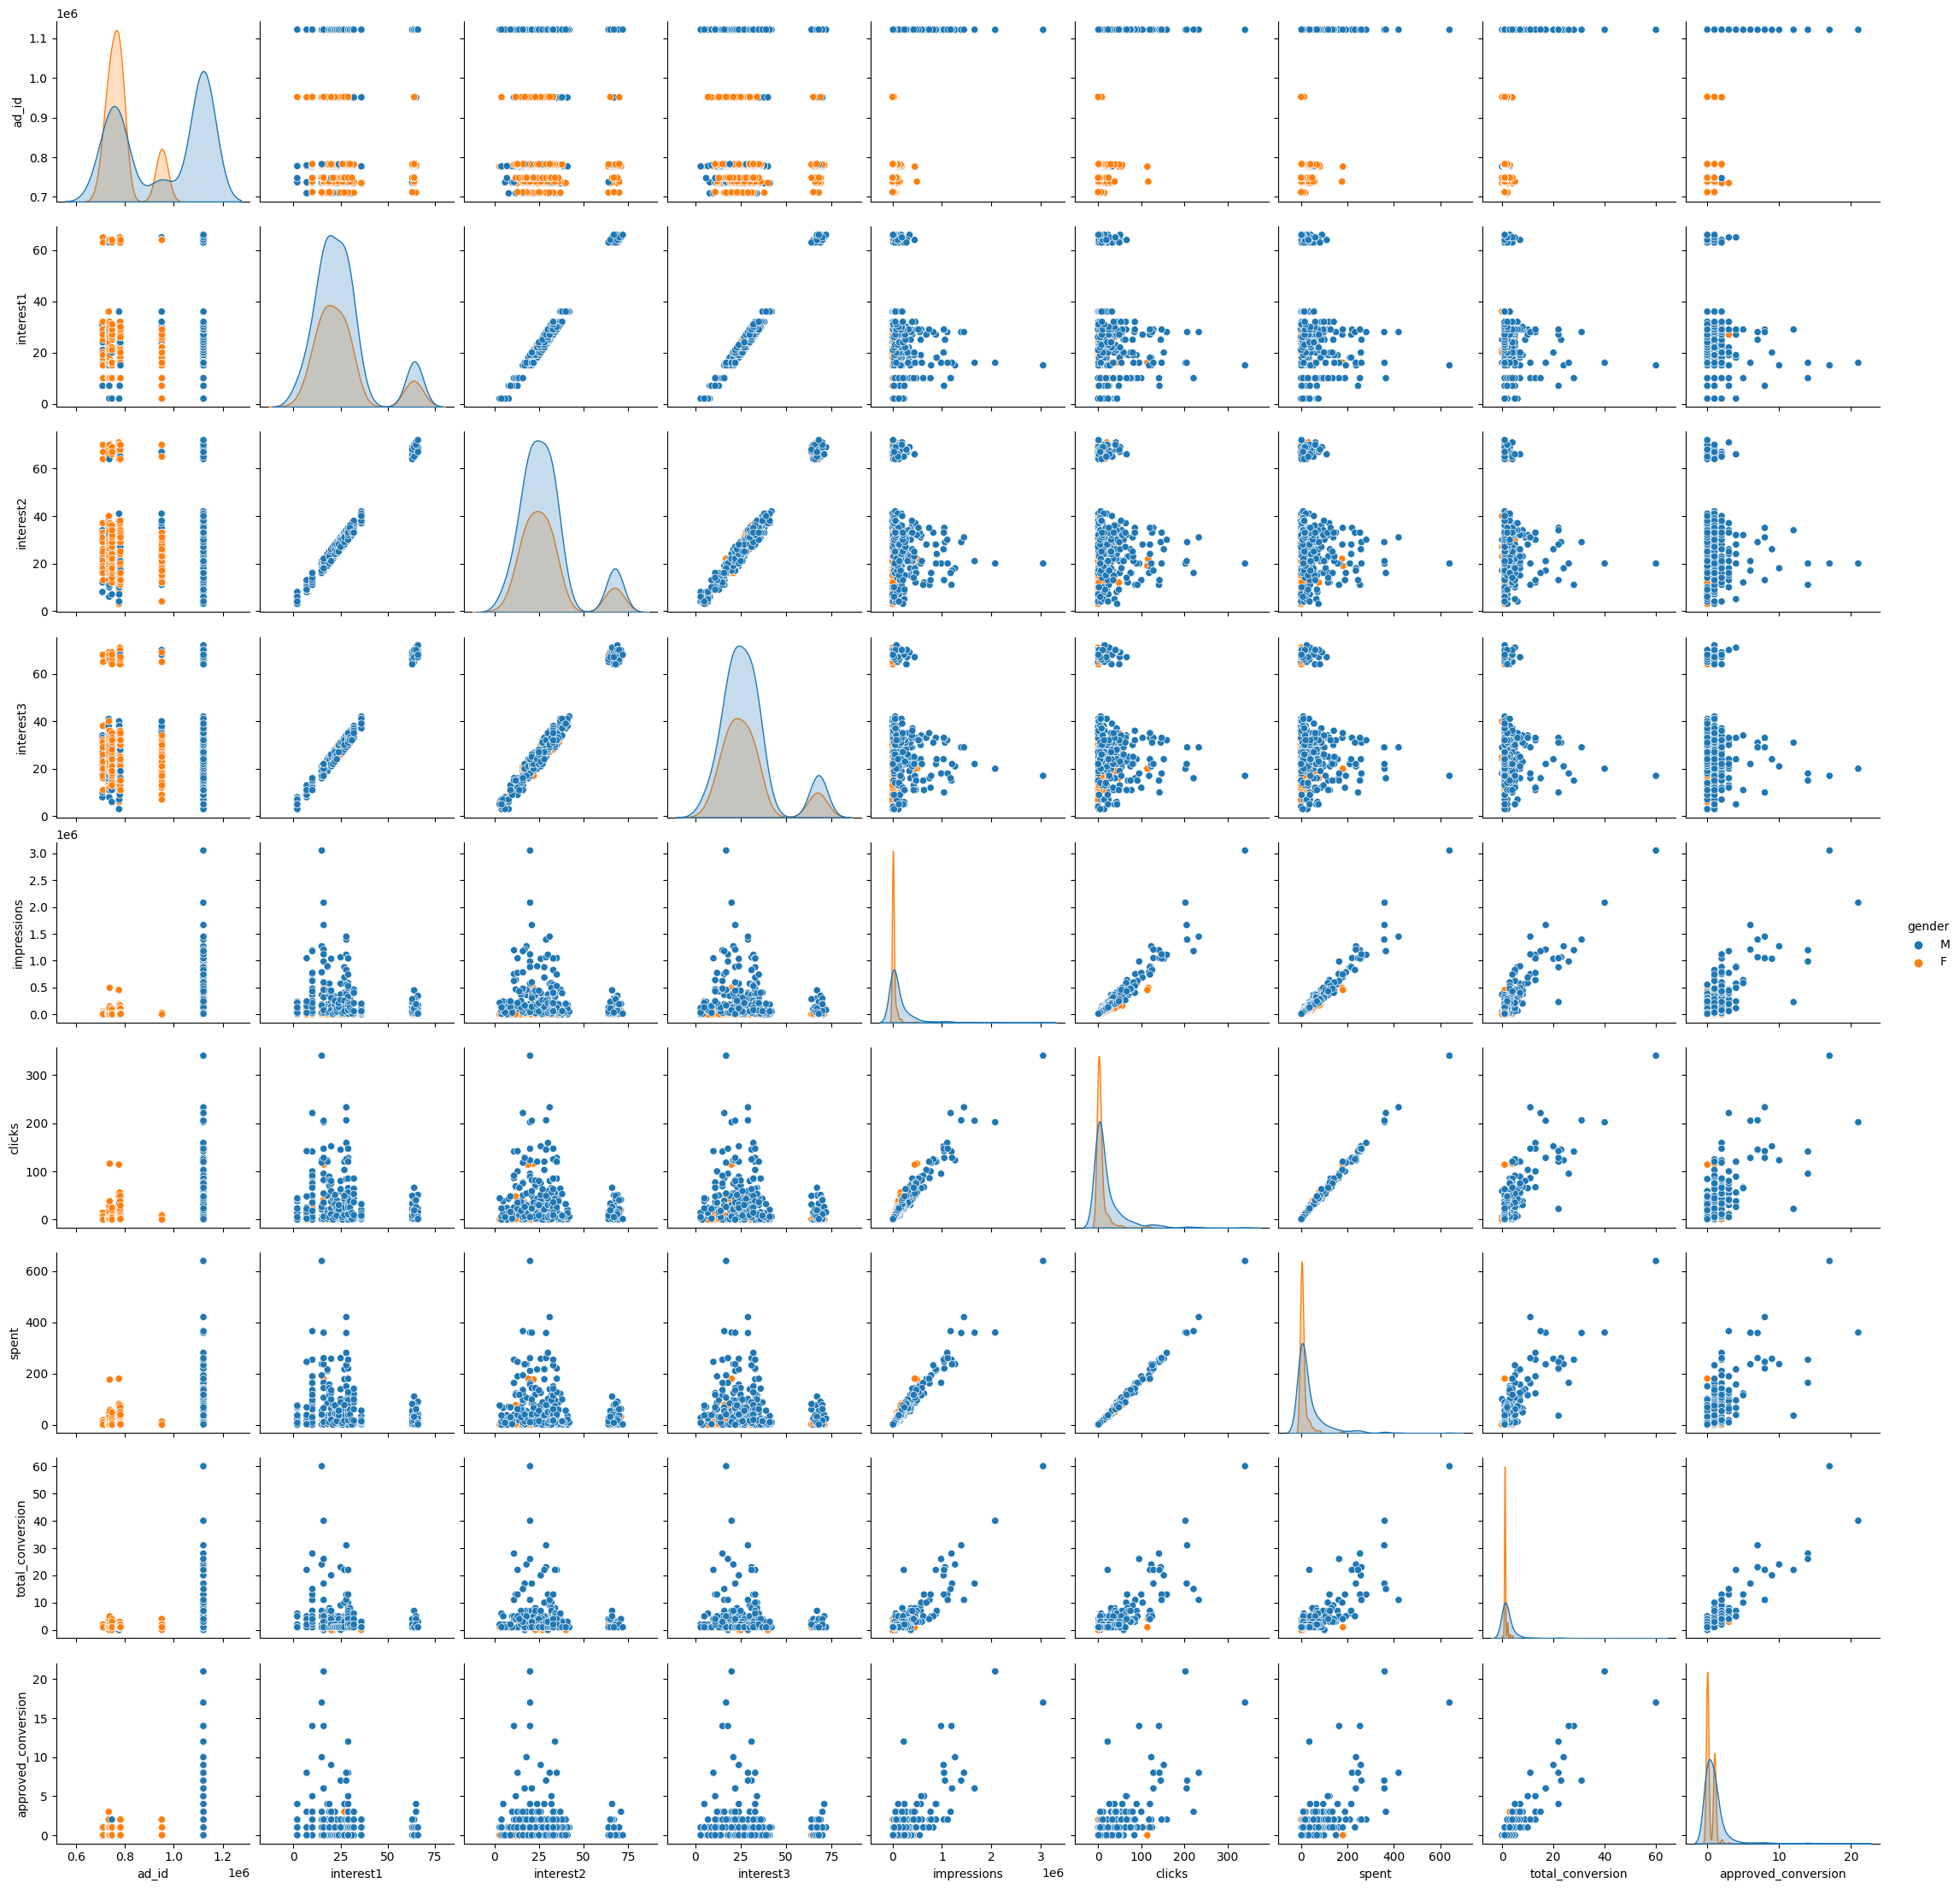

In [18]:
sns.pairplot(df,hue='gender')

## Targetted Age in the Ad Campaign

Text(0.5, 1.0, 'Targetted Age in the Ad Campaign')

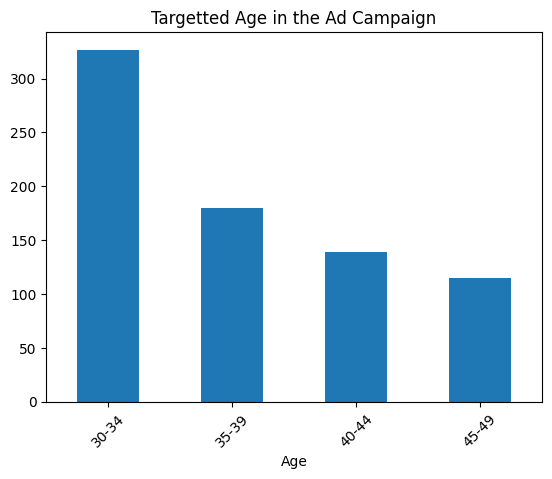

In [19]:
df.age.value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Age')
plt.title('Targetted Age in the Ad Campaign')

## Clicks in Age

Text(0.5, 1.0, 'Scatter plot')

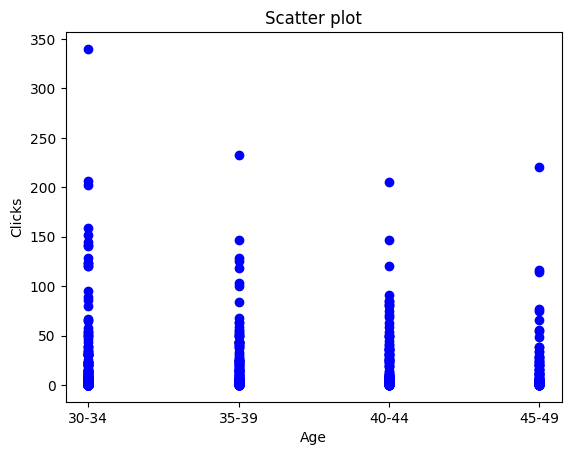

In [21]:
plt.scatter(df.age, df.clicks, c ="blue")
plt.xlabel("Age")
plt.ylabel("Clicks")
plt.title("Scatter plot")

## Correlation between these metrics

<ipython-input-22-2345118f251d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'ad_id'),
  Text(1.5, 0, 'interest1'),
  Text(2.5, 0, 'interest2'),
  Text(3.5, 0, 'interest3'),
  Text(4.5, 0, 'impressions'),
  Text(5.5, 0, 'clicks'),
  Text(6.5, 0, 'spent'),
  Text(7.5, 0, 'total_conversion'),
  Text(8.5, 0, 'approved_conversion')])

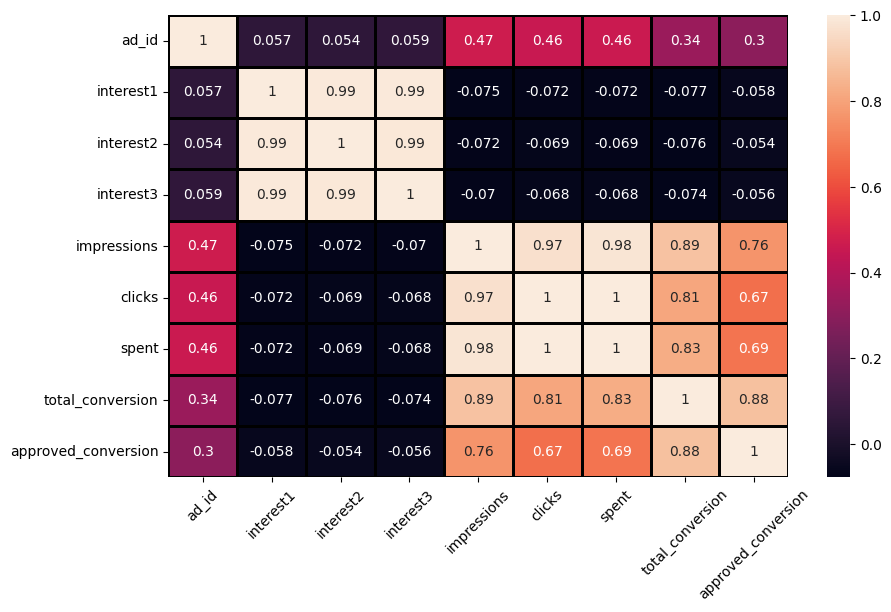

In [22]:
ax=plt.figure(figsize=(10,6))
corr=df.corr()
sns.heatmap(corr,linewidths=1,linecolor='black',annot=True)
plt.xticks(rotation=45)